<a href="https://colab.research.google.com/github/Hassan-zeidan/AAI614_Zeidan/blob/main/Week%204/project%201/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><font color="#e91e63">PROJECT 1</font></h1>
:</center>

# **Discription :**

In 1995 Kohavi and Becker extracted and cleaned this data from the 1994 US Census. It went on to be used as a benchmark dataset for many papers. In this project, we will work with this dataset to explore patterns of income and consider how time and location may alter or confound these relationships

### **Data exploration**

**1-** Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?  
**2-** How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.  
**3-** Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).  
**4-** The sampling weights in the dataset are contained in the variable fnlwgt. The weights indicate the share of the population that the sample represents based on location (and sometimes, other factors). More information is provided in this text file description of the data.  
**5-** Plot or numerically explore the distribution of fnlwgt. Is the variable symmetrically distributed? Compare the distribution of this variable between men and women and comment on any trends you notice. Should outliers be excluded? If you think yes, set the fnlwgt values for those you deem to be outliers as missing for the remainder of your analyses.


### **Correlation:**

Find the correlations between age, education_num, and hours_per_week.  

**1-** Do any of the variables appear to be correlated? How did you make your assessment?  
**2-** Statistically test any variable pairs with a correlation coefficient > |0.1| for its difference from 0 and report your result. Is the direction and significance of your finding as expected?  
**3-** How does the correlation (and its significance) between education_num and age compare between male and female participants? Is this expected?  
**4-** Compute the covariance matrix for education_num and hours_per_week. What conclusions can you draw from the covariance matrix?



---



---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---


**Uploading the files on google co lab , as a csv files**


---



In [ ]:
columns = [ "age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"]
base = "https://raw.githubusercontent.com/Hassan-zeidan/AAI614_Zeidan/main/Week%204/project%201/"
train = pd.read_csv(base + "adult.data" , header=None, names=columns , sep=r",\s*", engine="python")
test = pd.read_csv(base + "adult.test" , header=None, names=columns , sep=r",\s*", engine="python" , skiprows=1)



---


**Checking whether both files are working**


---



In [ ]:
train.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
test.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


---

  
<center><h1><font color="#e91e63">Data Exploration</font></h1></center>


---



---



  
<center><h1><font color="#e91e63">1 . Verify columns & data types</font></h1></center>


In [ ]:
print(train.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


The numeric columns (age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week) were correctly read as int64.  
The categorical columns (workclass, education , marital_status , occupation , relationship , race , sex , native_country, income) were read as object type, which is expected for string labels.

Therefore, the data types match the documentation.



---



---



<center><h1><font color="#e91e63">2 . Handling and Counting Missing Values </font></h1></center>

Missing values in this dataset are coded as " ?  "  

I converted all "?" to NaN .  

**In the train data:**  
workclass: 1836  
occupation: 1843  
native_country: 583    


**In the test data:**  
workclass: 963  
occupation: 966  
native_country: 274  

In [ ]:
train = train.replace("?", np.nan)
test  = test.replace("?", np.nan)
# Count missing values in each column
print(train.isna().sum(),"\n"*5)
print(test.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64 





age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64


<center><h1><font color="#e91e63">3 . Exploring and Transforming capital_gain and capital_loss </font></h1></center>

**Both variables are skewed: most values are 0, with a few very high outliers.**  

**Because of this, it is reasonable to transform them into categorical variables.**  

**I created binary variables (has_capital_gain and has_capital_loss) indicating whether a person had any gain or loss. The majority fall into the '0' category.**

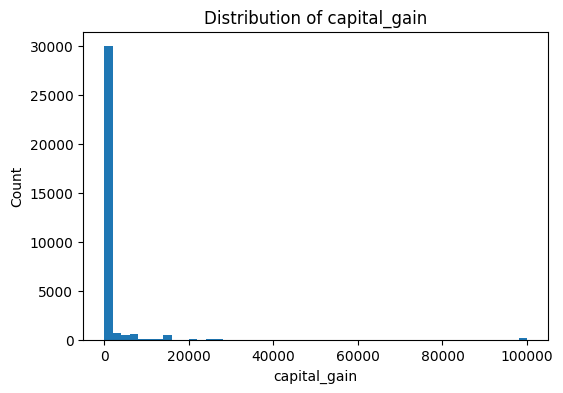

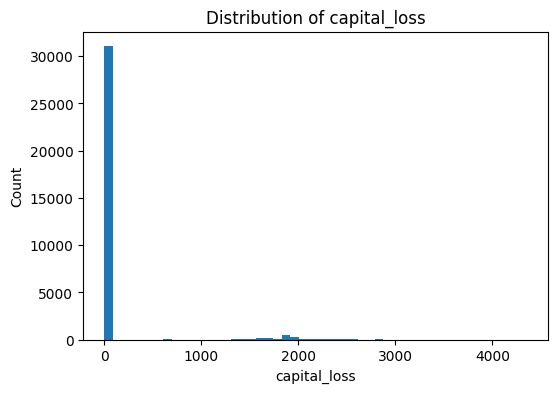

In [ ]:
# capital_gain
plt.figure(figsize=(6,4))
plt.hist(train["capital_gain"], bins=50)
plt.title("Distribution of capital_gain")
plt.xlabel("capital_gain")
plt.ylabel("Count")
plt.show()

# capital_loss
plt.figure(figsize=(6,4))
plt.hist(train["capital_loss"], bins=50)
plt.title("Distribution of capital_loss")
plt.xlabel("capital_loss")
plt.ylabel("Count")
plt.show()

In [ ]:
train["has_capital_gain"] = (train["capital_gain"] > 0).astype(int)
train["has_capital_loss"] = (train["capital_loss"] > 0).astype(int)

print("has_capital_gain counts:")
print(train["has_capital_gain"].value_counts().to_string())

print("\nhas_capital_loss counts:")
print(train["has_capital_loss"].value_counts().to_string())


has_capital_gain counts:
has_capital_gain
0    29849
1     2712

has_capital_loss counts:
has_capital_loss
0    31042
1     1519


In [ ]:
#I created binary indicators (has_capital_gain, has_capital_loss)to determine whether an individual had any gain/loss.
dist_table = pd.DataFrame({"has_capital_gain": train["has_capital_gain"].value_counts(),"has_capital_loss": train["has_capital_loss"].value_counts()})
print(dist_table)

   has_capital_gain  has_capital_loss
0             29849             31042
1              2712              1519


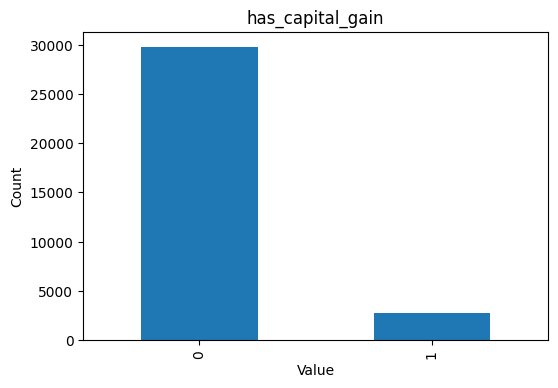

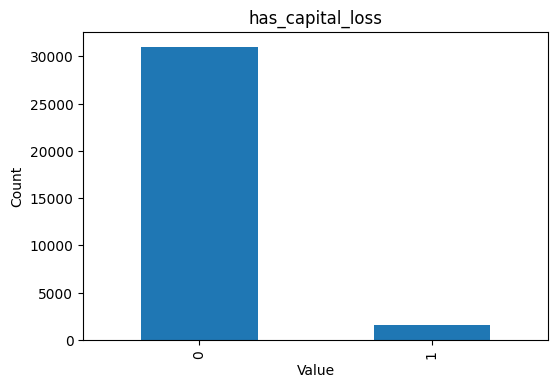

In [ ]:
#another way of presenting the resut using a histogram

plt.figure(figsize=(6, 4))
train["has_capital_gain"].value_counts().sort_index().plot(kind="bar")
plt.title("has_capital_gain")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 4))
train["has_capital_loss"].value_counts().sort_index().plot(kind="bar")
plt.title("has_capital_loss")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

<center><h1><font color="#e91e63">4-5 . Exploring the Distribution of fnlwgt and Identifying Outliers </font></h1></center>

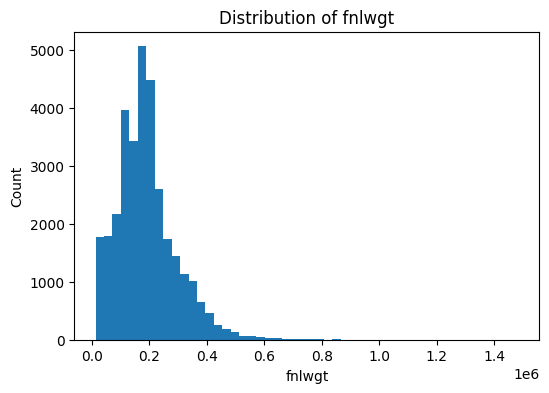

In [ ]:
# Histogram (raw)
plt.figure(figsize=(6,4))
plt.hist(train["fnlwgt"].dropna(), bins=50)
plt.title("Distribution of fnlwgt")
plt.xlabel("fnlwgt")
plt.ylabel("Count")
plt.show()

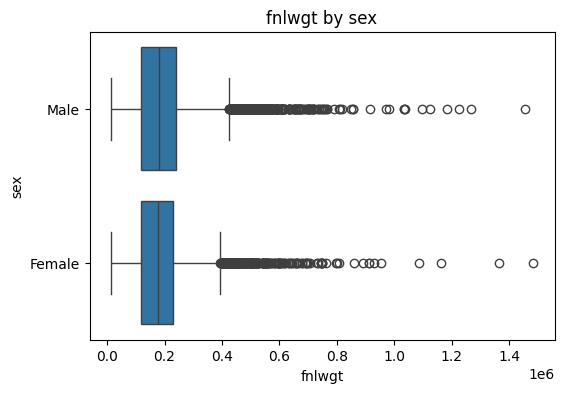

          count       mean        std      min        25%       50%  \
sex                                                                   
Female  10771.0  185746.31  102986.08  12285.0  117363.00  176077.0   
Male    21790.0  191771.45  106740.70  13769.0  118200.75  180140.0   

              75%        max  
sex                           
Female  228331.50  1484705.0  
Male    241146.25  1455435.0  


In [ ]:

# Boxplot by sex
plt.figure(figsize=(6,4))
sns.boxplot(data=train, x="fnlwgt", y="sex" , orient="h")
plt.title("fnlwgt by sex")
plt.show()

# Numeric summary
print(train.groupby("sex")["fnlwgt"].describe().round(2))

the fnlwgt values are not balanced, they are really pushed to the right side with alot of big numbers showing up. when i look at men and women, the shape is almost the same, their median and spread looks close. i see many dots outside the boxplot which means alot of outliers, but this is normal in survey weights cause some small groups get really large weights. for my work i decided to keep them, just mention they are there.

# <center><h1><font color="#e91e63">Corrolation </font></h1></center>


---



---



---





 <center><h1><font color="#e91e63">1. Assessing Correlations Between Age, Education, and Working Hours </font></h1></center>


In [ ]:
cols = ["age", "education_num", "hours_per_week"]
corr_matrix = train[cols].corr()
print(corr_matrix)

                     age  education_num  hours_per_week
age             1.000000       0.036527        0.068756
education_num   0.036527       1.000000        0.148123
hours_per_week  0.068756       0.148123        1.000000


i checked the correlations between age, education_num and hours_per_week. most of them are very close to 0, which means no real relationship. the only one that shows some connection is education_num with hours_per_week (r = 0.15). this is above the 0.1 , so i will test it more. the others are too weak to consider.



 <center><h1><font color="#e91e63">2. Statistical Significance Test for Correlation Between Education and Working Hours </font></h1></center>

In [ ]:
import numpy as np
from scipy import stats
x = train["education_num"].to_numpy()
y = train["hours_per_week"].to_numpy()

# to find the answer we either do the math step by step or we can use pearsonr which will give us the answer directly

r, pval = stats.pearsonr(x, y)

n=len(x)
t_stat= r * np.sqrt(n - 2) / np.sqrt(1 - r**2)
dof = n-2 # degrees of freedom

print(f"coefficient of corrolation = {round(r,3)}")
print(f"p-value = {pval}")                              #I didnt round it because it was showing a zero
print(f"t-statistic = {round(t_stat,3)}")
print(f"degrees of freedom = {dof}")

coefficient of corrolation = 0.148
p-value = 4.236647478995814e-159
t-statistic = 27.026
degrees of freedom = 32559


the correlation between education_num and hours_per_week came out r = 0.15. i tested it with pearson and the t-value was very large (about 27) because the sample size is huge. the p-value is super small (basically zero), so i reject the null. this means the relationship is statistically real, but the effect itself is weak. in other words, people with more education tend to work a little more hours, but it’s not a strong link.



 <center><h1><font color="#e91e63">3.
Comparing Correlation Between Age and Education by Sex </font></h1></center>


In [ ]:
from scipy import stats
male = train[train["sex"]=="Male"][["age", "education_num"]]
female = train[train["sex"]=="Female"][["age", "education_num"]]
male.head()


,age,education_num
0,39,13
1,50,13
2,38,9
3,53,7
7,52,9


In [ ]:
correlation_male , pval_male = stats.pearsonr(male["age"],male["education_num"])
correlation_female , pval_female = stats.pearsonr(female["age"],female["education_num"])

print(f"coefficient of corrolation of males = {correlation_male} ")
print(f"coefficient of corrolation of females = {correlation_female} ")
print(f"p-value of males = {pval_male} ")
print(f"p-value of females = {pval_female} ")
print(f"male n= {len(male)}")
print(f"female n= {len(female)}")

coefficient of corrolation of males = 0.060486409198268254 
coefficient of corrolation of females = -0.017899243935447697 
p-value of males = 4.022986830139681e-19 
p-value of females = 0.06322895030880603 
male n= 21790
female n= 10771


when i split the data, the correlation between age and education for men was like 0.06, very small but with so many people it came out significant. for women the correlation was almost zero (-0.018) and the p-value was bigger than 0.05, so not significant. overall, the link between age and education is basically weak or absent, which makes sense since education is mostly fixed when you’re young.

 <center><h1><font color="#e91e63">4. Covariance Between Education and Working Hours </font></h1></center>

In [ ]:
cols = ["education_num", "hours_per_week"]
cov_matrix = train[cols].dropna().cov()
print(cov_matrix)

                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995


the covariance matrix shows the variance of each variable on the diagonal and their joint covariance diagonal. education_num variance is around 6.6 which is small since the values only go from 1 to 16. hours_per_week variance looks bigger (152) but that's fine because variance is in squared units. if we take the square root it's about 12 hours, so most people are around (+ or -) 12 hours from the average work week. the covariance between education and hours is about 4.7, positive but small, which means people with more education tend to work a bit more hours, but the link is weak.

# <center><h1><font color="#e91e63">Regression </font></h1></center>

 <center><h1><font color="#e91e63">1. Do men tend to work more hours? </font></h1></center>

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

df = train[["hours_per_week", "sex"]].dropna().copy()
df["sex_binary"] = df["sex"].map({"Female": 0, "Male": 1})

X = df[["sex_binary"]].to_numpy()
y = df["hours_per_week"].to_numpy()

lr = LinearRegression().fit(X, y)
print("Intercept (Female mean):", lr.intercept_)
print("Coef (Male - Female):",   lr.coef_[0])
print("R^2:", lr.score(X, y))


Intercept (Female mean): 36.41036115495312
Coef (Male - Female): 6.017725123156097
R^2: 0.05258268582717096


Yes, men tend to work more hours than women , about 6 hours more per week on average in this dataset. But gender by itself doesn’t explain much of the variation in working hours (R^2 is low)

 <center><h1><font color="#e91e63">2. Is education_num significant </font></h1></center>

In [ ]:
from sklearn.linear_model import LinearRegression

# keep only needed columns and drop missing
df = train[["hours_per_week", "sex", "education_num"]].dropna().copy()
df["sex_binary"] = df["sex"].map({"Female": 0, "Male": 1})

X = df[["sex_binary", "education_num"]].to_numpy()
y = df["hours_per_week"].to_numpy()

lr2 = LinearRegression().fit(X, y)
print("Intercept:", lr2.intercept_)
print("Coef (Male - Female):", lr2.coef_[0])
print("Coef (per year of education):", lr2.coef_[1])
print("R^2:", lr2.score(X, y))



Intercept: 29.4105717490787
Coef (Male - Female): 5.970890967107847
Coef (per year of education): 0.6974858382966225
R^2: 0.07369993753726667


In [ ]:
import statsmodels.api as sm

df = train[["hours_per_week", "sex", "education_num"]].dropna().copy()
df["sex_binary"] = df["sex"].map({"Female": 0, "Male": 1})

X = sm.add_constant(df[["sex_binary", "education_num"]])
y = df["hours_per_week"]

model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        08:09:39   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            29.4106      0.281    104.556

this model looks at how sex and education affect the number of hours people work. the intercept means a female with zero years of education would work about 29.4 hours a week, but that’s just a baseline and not a real situation. the sex coefficient shows that men work around 5.97 more hours per week than women, even after accounting for education, and this difference is statistically significant. the education coefficient shows that each extra year of education adds about 0.7 hours of work per week, which is also significant. the model explains about 7.4% of the variation in working hours, so the effect is real but not very strong. overall, both gender and education matter: men tend to work more, and people with higher education usually work slightly longer hours.

 <center><h1><font color="#e91e63">3. What statistic would you choose to decide which model is the best? Describe how you could re-do what was just done using a model fitting procedure. </font></h1></center>


In [ ]:
import statsmodels.api as sm

df = train[["hours_per_week", "sex", "education_num", "income"]].dropna().copy()
df["sex_binary"] = df["sex"].map({"Female": 0, "Male": 1})
df["gross_income_group"] = df["income"].map({"<=50K": 0, ">50K": 1})

X = sm.add_constant(df[["sex_binary", "education_num", "gross_income_group"]])
y = df["hours_per_week"]

model3 = sm.OLS(y, X).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        08:14:15   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 31.4218      0

this model includes sex, education, and income group together. the intercept means a female with zero education and low income is predicted to work about 31.4 hours a week, but that’s just the baseline. the coefficient for sex is about 5.10, so even after controlling for education and income, men still work roughly 5 hours more per week than women. the education coefficient is about 0.45, showing that every extra year of education increases working hours by less than half an hour. the income coefficient is about 4.52, which means people earning more than 50k work around 4.5 more hours weekly than those earning less. all three variables are statistically significant (p < 0.001). the r² is about 0.094, a bit higher than before, meaning the three variables together explain around 9.4% of the differences in working hours. overall, gender, education, and income all play a role, but most variation still comes from other factors.

when i compare the three models, i see that the r² increases each time we add a new variable. the first model with only gender explains about 5.3% of the variation in working hours. adding education raises it to around 7.4%, and adding income raises it again to about 9.4%. that means each new variable helps the model explain working hours better. the third model is the best because it includes all three important variables and explains the largest part of the variation.

i built the models step by step, starting with gender, then adding education, then income. after each step i compared the r² values to see if the model improved. this showed how each factor adds more information and makes the prediction more accurate.